

<h1 style = "font-size:50px; font-family:Garamond ; font-weight : normal; background-color: #f6f5f5 ; color : 'black'; text-align: center; border-radius: 100px 100px;"> Table of Contents</h1>

####  <a href = '#introduction'>1. Introduction </a>
####  <a href = '#section2'>2. Importing Libraries</a>
####  <a href = '#section3'>3. Importing Dataset </a>
####  <a href = '#section4'>4. Data Description </a>
####  <a href = '#section16'>5. Feature Manipulation </a>
####  <a href = '#section17'>6. Word Cloud </a>
####  <a href = '#section20'>7. Movies V/S TV Shows </a>
####  <a href = '#section21'>8. Rating & Content Type </a>
####  <a href = '#section22'>9. Distribution of Genres </a>
####  <a href = '#section23'>10. Duration of Movies </a> 
####  <a href = '#section24'>11. Correlation within the categories(Genres)</a> 
####  <a href = '#section24'>12. Release Year</a> 
####  <a href = '#section24'>13. Distribution of content for different countries</a> 
####  <a href = '#section24'>14. Recommender System</a> 
####  <a href = '#section24'>15. References</a> 




<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 1. Introduction </h1>

# What is Netflix?
Netflix is a subscription based streaming service which allows its users to watch TV shows, movies, documentaries etc. from a wide range of it extensive catalogue. Netflix provides an ad-free service to all its users and is constantly expanding its buisness, including more content every month!

![](https://upload.wikimedia.org/wikipedia/en/f/f4/Netflix_-_English.jpg)

# Why Recommendation systems are needed in Netflix?

Recommendation Systems are used in Netflix or any other streaming services to provide its users with the best content possible based on what they have already watched to keep its users engaged so that they want to come back to using the Netflix services as much as possible.

![](https://www.extremetech.com/wp-content/uploads/2016/03/Netflix-Feature.jpg)

### First, I will start with some visualisations


<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 2. IMPORTING LIBRARIES </h1>

In [1]:
'''Import basic modules.'''
import pandas as pd
import numpy as np


'''Customize visualization
Seaborn and matplotlib visualization.'''
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
py.init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

'''missing data visualisation'''
import missingno as msno

import cufflinks as cf #importing plotly and cufflinks in offline mode  
import plotly.offline  
cf.go_offline()  
cf.set_config_file(offline=False, world_readable=True)

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

'''Display markdown formatted output like bold, italic bold etc.'''
from IPython.core.display import display, HTML, Javascript
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
def bold(string):
    display(Markdown(string))


<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 3. IMPORTING DATASET </h1>

In [2]:
df = pd.read_csv("/kaggle/input/netflix-shows/netflix_titles.csv")



<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 4. Data Description </h1>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
df.shape

(7787, 12)



The dataset has 7787 rows and 12 columns:

*     show_id: unique id of each show (not much of a use for us in this notebook)
*     type: The category of a show, can be either a Movie or a TV Show
*     title: Name of the show
*     director: Name of the director(s) of the show
*     cast: Name of actors and other cast of the show
*     country: Name of countries the show is available to watch on Netflix
*     date_added: Date when the show was added on Netflix
*     release_year: Release year of the show
*     rating: Show rating on netflix
*     duration: Time duration of the show
*     listed_in: Genre of the show
*     description: Some text describing the show



In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

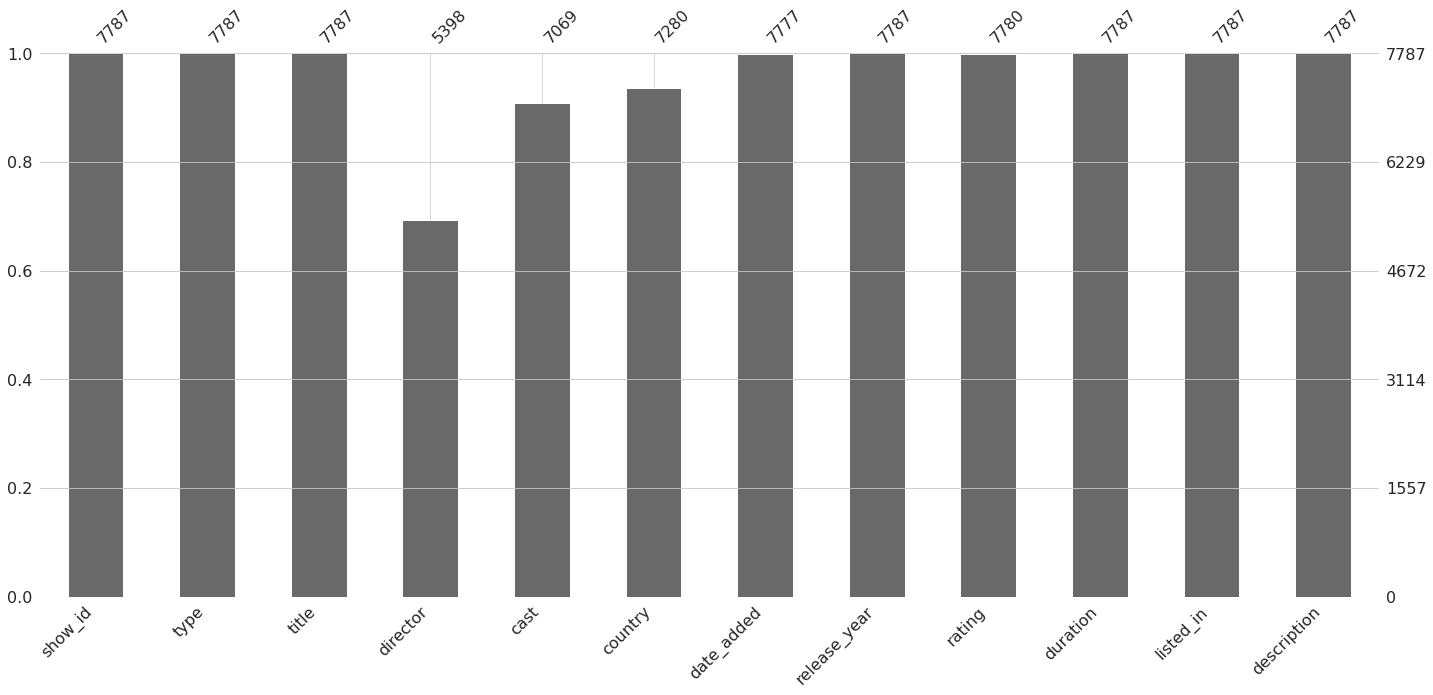

In [6]:
# Visualize the number of missing values as a bar chart
msno.bar(df);

There are multiple columns which have null values.

For my EDA analysis, I have not done any cleaning at all as I don't want to mess with the original data that we have.

However, for my Recommendation system I will replace the `null` values.




<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 5. Feature Manipulation </h1>

We extract out the data, month and year in which the content was added to Netflix.

We also separate out the number of seasons and time duration in 2 different columns.

In [7]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else "", axis = 1)
df['duration'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else "", axis = 1)

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,


There are few columns which have null values in them. We have to take care of them later.




<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 6. WORD CLOUD </h1>

We prepare a word cloud to check the frequency of different words used in the titles of TV shows and movies.

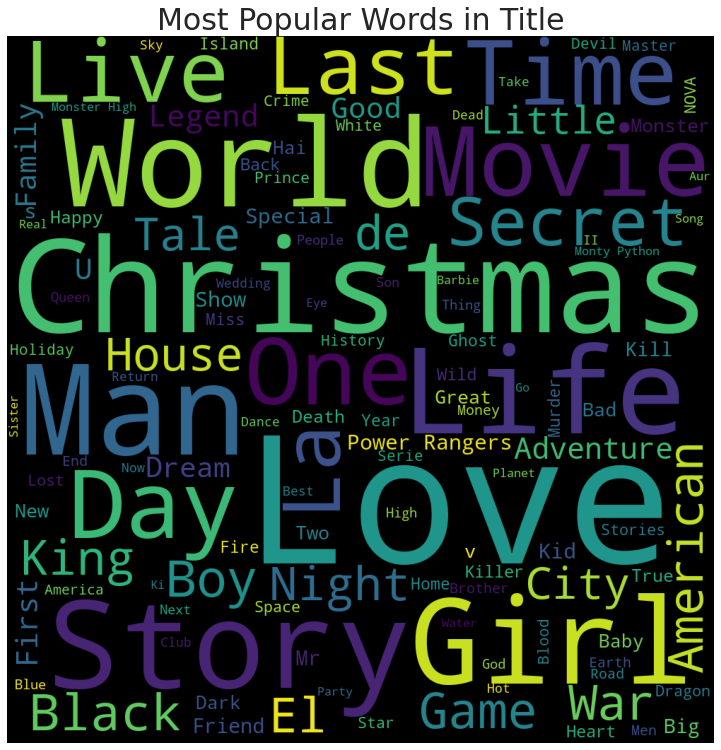

In [9]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(df['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Words in Title',fontsize = 30)
plt.show()

It seems like words like **"Love"**, **"Man", "World", "Story"** are very common in titles.

However, I am suprised by the overwhelming number of content having **"Christmas"** in their title.

I am suspecting **"Christmas"** titles to be a very seasonal thing with most of the shows likely to be released during the onth of December. However, I do not have the release data in this data to conform my hypothesis.




<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 7. MOVIES V/S TV SHOWS </h1>

Here, we check the distribution of Movies v/s TV shows that are being added to Netflix.

In [10]:
'''A Function To Plot Pie Plot using Plotly'''

def pie_plot(cnt_srs, colors, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=colors,
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace


py.iplot([pie_plot(df['type'].value_counts(), ['red', 'blue'], 'Content Type')])

From the pie chart, it is clear that Netfix has an overwhelming number of movies than TV shows.

There may be 2 reasons for this:

1. Netflix might primarily be a movie streaming service. However, this seems unlikely given that it does have a substantial number of TV shows.

2. The amount of money to produce a high production value TV show is much higher than producing a full feature film which may lead higher number o0f movies in general.

In [11]:
d1 = df[df["type"] == "TV Show"]
d2 = df[df["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(
                    x=vc1[col], 
                    y=vc1["count"], 
                    name="TV Shows", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

trace2 = go.Scatter(
                    x=vc2[col], 
                    y=vc2["count"], 
                    name="Movies", 
                    marker= dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(hovermode= 'closest', title = 'Content added over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'),template= "plotly_dark")
fig = go.Figure(data = [trace1, trace2], layout=layout)
fig.show()

We can see that the content being added is steadily increasing over the years.

However, in 2020 number of movies dropped significantly.

This might be due to Covid-19 which led theaters being shut down all over the world.

But, TV show production wasn't affected much as those were produced to binge in everyone's home.




<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 8. RATING & CONTENT TYPE </h1>

In [12]:
temp_df = df['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['rating'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'MOST OF PROGRAMME ON NEYFLIX IS TV-14 & TV-MA RATED' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

def pie_plot(cnt_srs, title):
    labels=cnt_srs.index
    values=cnt_srs.values
    trace = go.Pie(labels=labels, 
                   values=values, 
                   title=title, 
                   hoverinfo='percent+value', 
                   textinfo='percent',
                   textposition='inside',
                   hole=0.7,
                   showlegend=True,
                   marker=dict(colors=plt.cm.viridis_r(np.linspace(0, 1, 14)),
                               line=dict(color='#000000',
                                         width=2),
                              )
                  )
    return trace

py.iplot([pie_plot(df['rating'].value_counts(), 'Content Type')])

The 2 most common ratings are:
1. TV-MA : These are primarily adult shows meant for indivuals above the age of 17. These shows may contain graphic violence (V), explicit sexual activity (S), or crude indecent language (L).
2. TV-14 : These are meant for individuals above the age of 14 and may include: intense violence (V), intense sexual situations (S), strong coarse language (L), or intensely suggestive.

In [13]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['rating'].value_counts().reset_index()
temp_df2 = df2['rating'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['rating'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['rating'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))


layout = go.Layout(template= "plotly_dark",title = 'RATING BY CONTENT TYPE' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

Both these plots suggests that adult content is more popular in Netflix.

It may be suggestive of the fact that majority of its users are teenagers and young adults, hwever, this data os insufficient to conclude this fact.


<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 9. Distribution of Genres </h1>

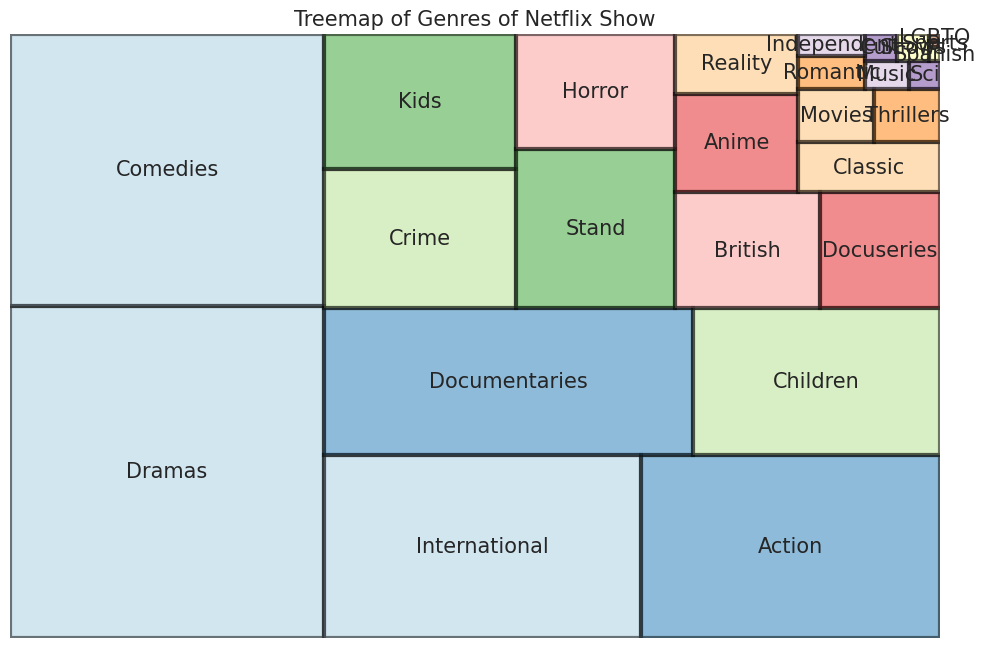

In [14]:
import squarify
df['Genres'] = df['listed_in'].str.extract('([A-Z]\w{2,})', expand=True)
temp_df = df['Genres'].value_counts().reset_index()

sizes=np.array(temp_df['Genres'])
labels=temp_df['index']
colors = [plt.cm.Paired(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize=(12,8), dpi= 100)
squarify.plot(sizes=sizes, label=labels, color = colors, alpha=.5, edgecolor="black", linewidth=3, text_kwargs={'fontsize':15})
plt.title('Treemap of Genres of Netflix Show', fontsize = 15)
plt.axis('off')
plt.show()

In [15]:
temp_df = df['Genres'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df['index'],
                y = temp_df['Genres'],
                marker = dict(color = 'rgb(255,165,0)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'GENRE DISTRIBUTION' , xaxis = dict(title = 'Genres'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()




<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 10. DURATION OF MOVIES </h1>

In [16]:
d2 = df[df["type"] == "Movie"]
d2['duration']=d2['duration'].str.replace(' min','')
d2['duration']=d2['duration'].astype(str).astype(int)

In [17]:
import plotly.figure_factory as ff
x1 = d2['duration'].fillna(0.0).astype(float)
fig = ff.create_distplot([x1], ['a'], bin_size=0.7, curve_type='normal', colors=["#6ad49b"])
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

As we can see from this plot, majority of the movies are around the 80-120 minutes mark.

In [18]:
duration_year = d2.groupby(['release_year']).mean()
duration_year = duration_year.sort_index()

trace1 = go.Scatter(
                    x=duration_year.index, 
                    y=duration_year.duration.values, 
                    name="Duration of movies", 
                    marker=dict(color = 'rgb(249, 6, 6)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))

layout = go.Layout(hovermode= 'closest', title = 'Duration of Movies over the years' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Mean Duration'),template= "plotly_dark")
fig = go.Figure(data = [trace1], layout=layout)
fig.show()

We can see that initially in the 1930s up untill the 60s the duration of the movies had been increasing which might be due to the rapid devolopment of new technologies which helped in creating more and more lengthy films.

But after the 60s it dropped but was roughly constant till 2000s after which it dropped probably due to inclusion of more and more short films and documentaries.




<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 11. CORRELATION WITHIN THE CATEGORIES(GENRES) </h1>

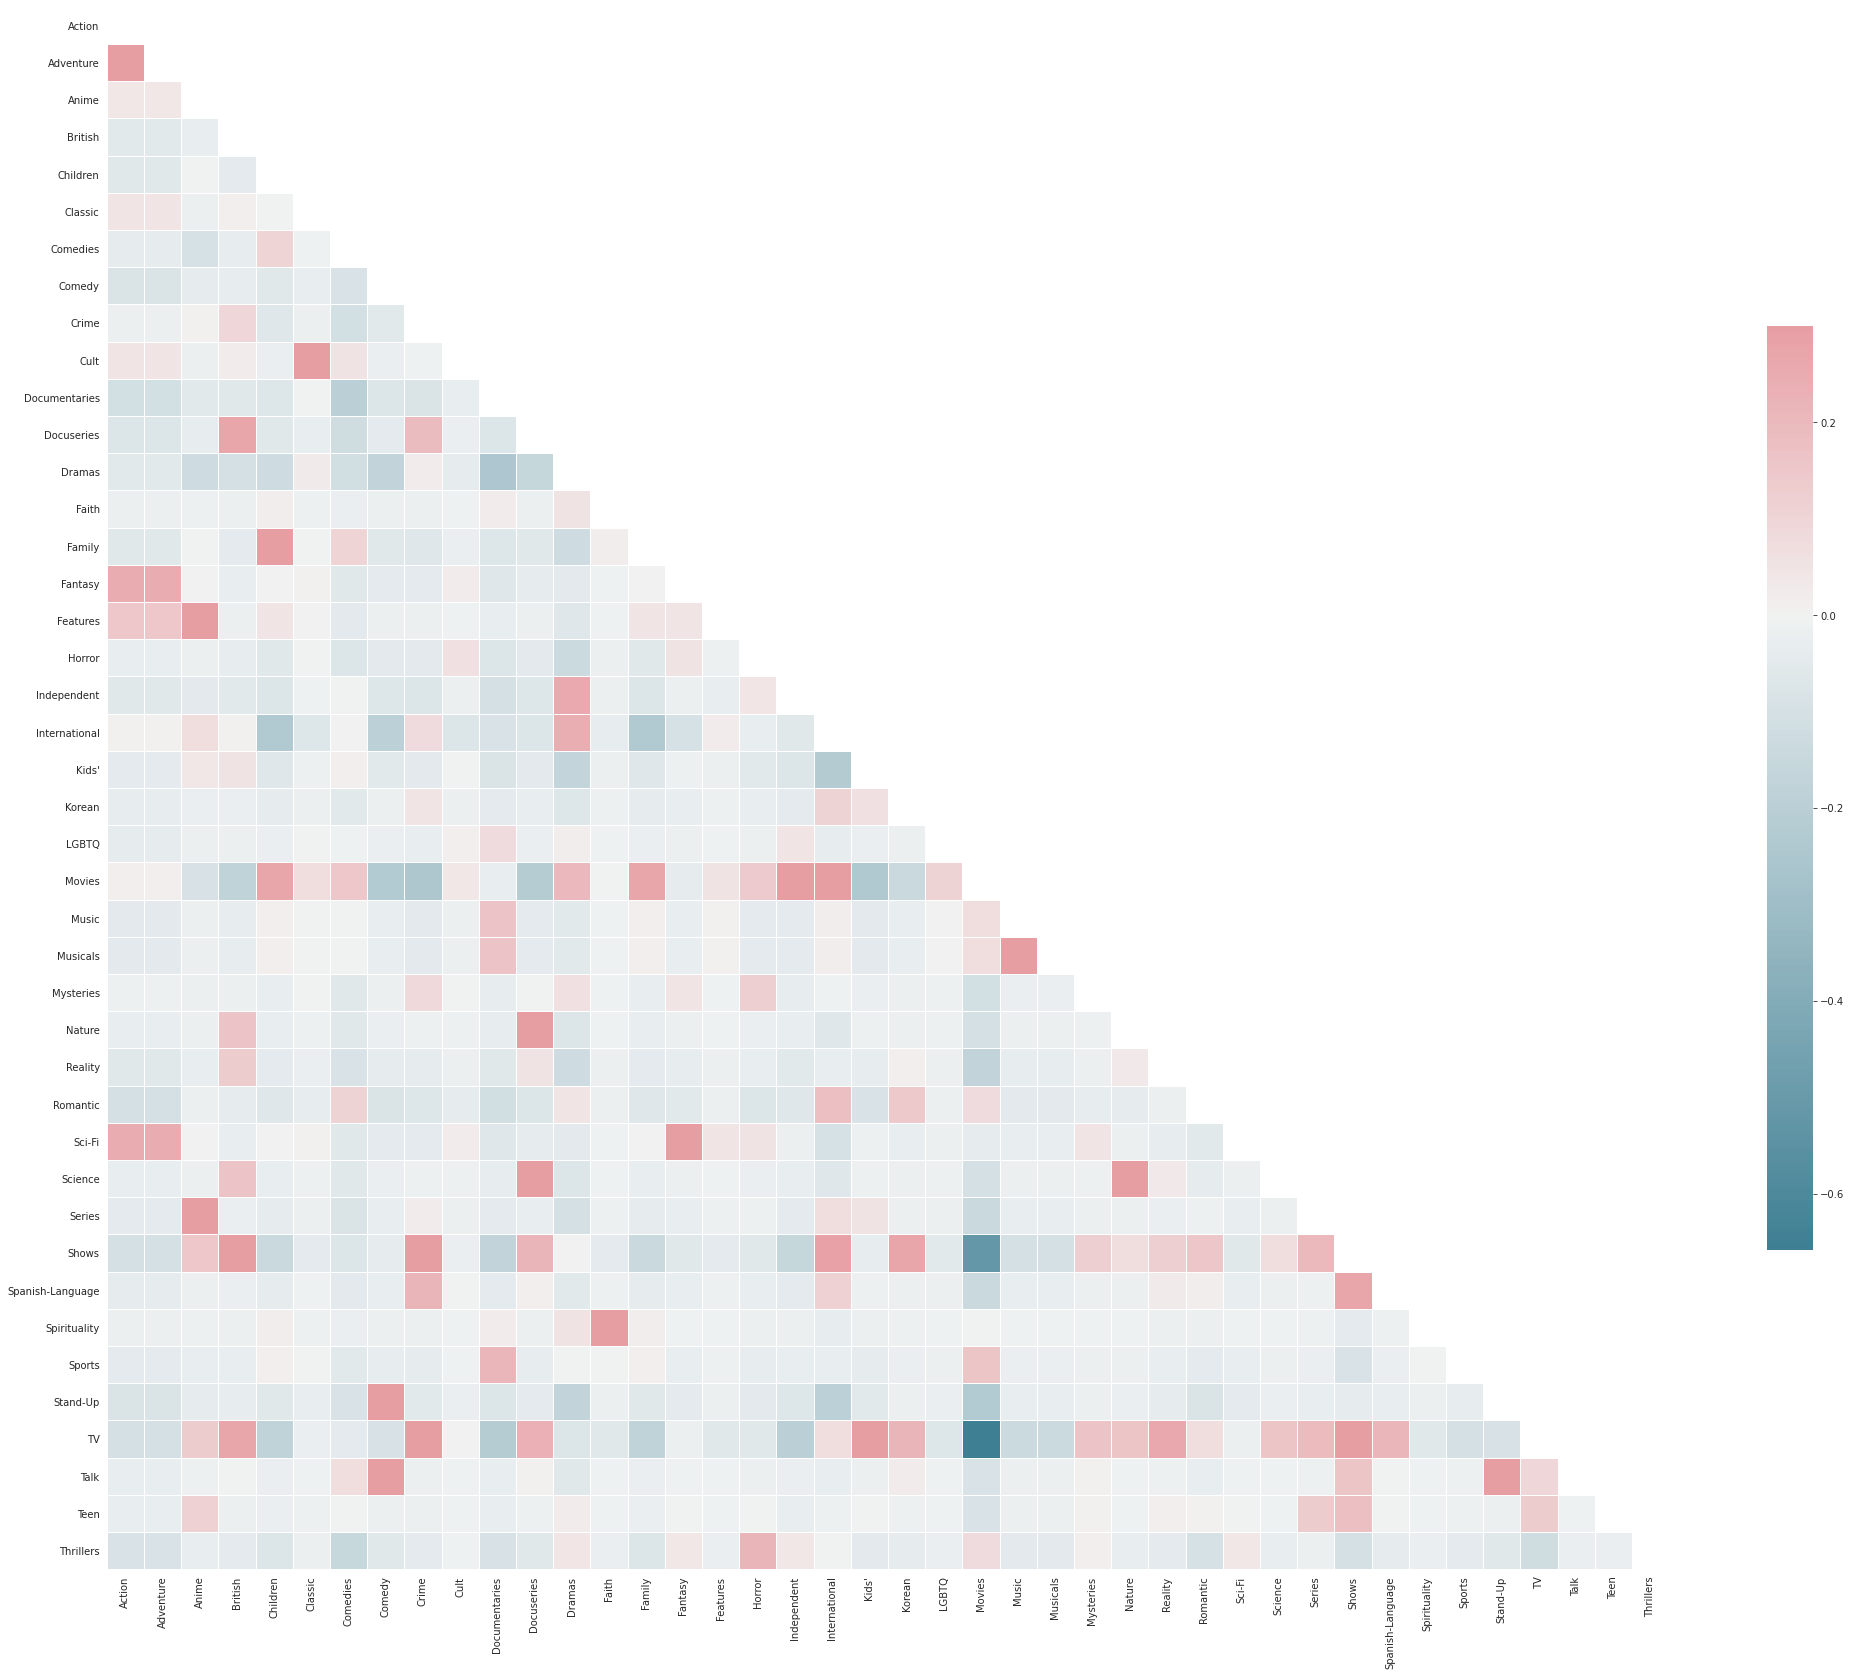

In [19]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

data= df['listed_in'].astype(str).apply(lambda s : s.replace('&',' ').replace(',', ' ').split()) 

test = data
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_)
corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(35, 34))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()




<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 12. RELEASE YEAR </h1>

In [20]:
temp_df1 = df['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                marker = dict(color = 'rgb(255,165,0)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR' , xaxis = dict(title = 'Rating'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

This is an expected trend, with the content increasing till 2018.

However, the sudden decrease of content in 2019 is unexpected and I have no possible explanation to explain this sudden decrease.

The decrease of content for 2020 can be explained by Covid-19.

In [21]:
df1 = df[df["type"] == "TV Show"]
df2 = df[df["type"] == "Movie"]

temp_df1 = df1['release_year'].value_counts().reset_index()
temp_df2 = df2['release_year'].value_counts().reset_index()


# create trace1
trace1 = go.Bar(
                x = temp_df1['index'],
                y = temp_df1['release_year'],
                name="TV Shows",
                marker = dict(color = 'rgb(249, 6, 6)'))
# create trace2 
trace2 = go.Bar(
                x = temp_df2['index'],
                y = temp_df2['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)'))


layout = go.Layout(template= "plotly_dark",title = 'CONTENT RELEASE OVER THE YEAR BY CONTENT TYPE' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()




<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 13. Distribution of content for different countries </h1>

In [22]:
country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="Heatmap of countries over amount of content", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(template= "plotly_dark", title="Top 25 Countries with most content", xaxis = dict(title = 'Amount of Content'), yaxis = dict(title = 'Countries'), height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

The first figure shows us a heatmap of the entire world over the amount of content contributed by each coutry to Netflix.

The second figure shows a horizontal bar graph showing how much content each country(top 25) contributes.

The top 5 content producers are - US, India, UK, Canada, France and Japan respectively.

Which is expected since entertainment industries in these 6 countries are very prominent.

However, I would have expected India to have content closer to US. Since, India produces a higher number of films than the US.

Since, Netflix is an US company, it might be easier to get more content from the US which may explain this discrepancy.




<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 14. Recommender System </h1>

A recommender system is an application of machine learning that provides recommendations to users on what they might like based on their historical preferences.

<a href="https://ibb.co/cwBV4KF"><img src="https://i.ibb.co/m0jgfrq/1-l-GB0-UTSFwb0wk-Pe-HHDMl-A.png" alt="1-l-GB0-UTSFwb0wk-Pe-HHDMl-A" border="0"></a>

# Content-Based Movie Recommender System

<img src="https://miro.medium.com/max/1026/1*BME1JjIlBEAI9BV5pOO5Mg.png" style="width: 200px;"/>

A content-based recommender learns a profile of the new user’s interests based on the features present, in objects the user has rated. It’s basically a keyword specific recommender system here keywords are used to describe the items. **Thus, in a content-based recommender system the algorithms used are such that it recommends similar items that the user has liked in the past or is examining currently.**

The recommender system I will be using will suggest users movies based on:

* Director
* Cast
* Genre
* Description
* Title

# Selecting the required features

In [23]:
#new_df = df[['director','cast','listed_in','country','release_year']]



features=['Genres','director','cast','description','title']
filters = df[features]

filters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genres       7787 non-null   object
 1   director     5398 non-null   object
 2   cast         7069 non-null   object
 3   description  7787 non-null   object
 4   title        7787 non-null   object
dtypes: object(5)
memory usage: 304.3+ KB


# Filling the null values with the mode of that column

In [24]:
filters['director'] = filters['director'].fillna(filters['director'].mode()[0])
filters['cast'] = filters['cast'].fillna(filters['cast'].mode()[0])

filters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Genres       7787 non-null   object
 1   director     7787 non-null   object
 2   cast         7787 non-null   object
 3   description  7787 non-null   object
 4   title        7787 non-null   object
dtypes: object(5)
memory usage: 304.3+ KB


# Cleaning the data to be applied to recommender system algorithm

In [25]:
#Cleaning the data by making all the words in lower case.
def clean_data(x):
        return str.lower(x.replace(" ", ""))

In [26]:
for feature in features:
    filters[feature] = filters[feature].apply(clean_data)
    
filters.head()

,Genres,director,cast,description,title
0,international,"raúlcampos,jansuter","joãomiguel,biancacomparato,michelgomes,rodolfo...",inafuturewheretheeliteinhabitanislandparadisef...,3%
1,dramas,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","afteradevastatingearthquakehitsmexicocity,trap...",7:19
2,horror,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","whenanarmyrecruitisfounddead,hisfellowsoldiers...",23:59
3,action,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","inapostapocalypticworld,rag-dollrobotshideinfe...",9
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",abrilliantgroupofstudentsbecomecard-countingex...,21


In [27]:


def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['Genres']+' '+ x['description']



In [28]:
filters['soup'] = filters.apply(create_soup, axis=1)

In [29]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filters['soup'])

# Calculating Cosine Similarity scores

Cosine similarity is finding the cosine distance between two users.


![COS](https://i.stack.imgur.com/36r1U.png)

In [30]:


# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)



In [31]:

filters

,Genres,director,cast,description,title,soup
0,international,"raúlcampos,jansuter","joãomiguel,biancacomparato,michelgomes,rodolfo...",inafuturewheretheeliteinhabitanislandparadisef...,3%,"raúlcampos,jansuter joãomiguel,biancacomparato..."
1,dramas,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","afteradevastatingearthquakehitsmexicocity,trap...",7:19,"jorgemichelgrau demiánbichir,héctorbonilla,osc..."
2,horror,gilbertchan,"teddchan,stellachung,henleyhii,lawrencekoh,tom...","whenanarmyrecruitisfounddead,hisfellowsoldiers...",23:59,"gilbertchan teddchan,stellachung,henleyhii,law..."
3,action,shaneacker,"elijahwood,johnc.reilly,jenniferconnelly,chris...","inapostapocalypticworld,rag-dollrobotshideinfe...",9,"shaneacker elijahwood,johnc.reilly,jennifercon..."
4,dramas,robertluketic,"jimsturgess,kevinspacey,katebosworth,aaronyoo,...",abrilliantgroupofstudentsbecomecard-countingex...,21,"robertluketic jimsturgess,kevinspacey,katebosw..."
...,...,...,...,...,...,...
7782,dramas,joseffares,"imadcreidi,antoinetteturk,eliasgergi,carmenleb...","whenlebanon'scivilwardepriveszozoofhisfamily,h...",zozo,"joseffares imadcreidi,antoinetteturk,eliasgerg..."
7783,dramas,mozezsingh,"vickykaushal,sarah-janedias,raaghavchanana,man...",ascrappybutpoorboywormshiswayintoatycoon'sdysf...,zubaan,"mozezsingh vickykaushal,sarah-janedias,raaghav..."
7784,documentaries,"raúlcampos,jansuter",nastyc,"inthisdocumentary,southafricanrappernastychits...",zulumaninjapan,"raúlcampos,jansuter nastyc documentaries inthi..."
7785,international,"raúlcampos,jansuter","adrianozumbo,rachelkhoo",dessertwizardadrianozumbolooksforthenext“willy...,zumbo'sjustdesserts,"raúlcampos,jansuter adrianozumbo,rachelkhoo in..."


In [32]:


# Reset index of our main DataFrame and construct reverse mapping as before
filters=filters.reset_index()
indices = pd.Series(filters.index, index=filters['title'])



# Defining the recommendation system

In [33]:
def get_recommendations_new(title, cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

# Getting Recommendations

In [34]:
get_recommendations_new('Attack on Titan', cosine_sim2)

995                                   Blue Exorcist
3853                   Magi: The Labyrinth of Magic
3472                            Kuroko's Basketball
947                                    Black Butler
6304    The Disastrous Life of Saiki K.: Reawakened
868                                  Beyblade Burst
869                        Beyblade Burst Evolution
3870                                     Maid-Sama!
4657                                  One-Punch Man
6303                The Disastrous Life of Saiki K.
Name: title, dtype: object

<h1 style = "font-size:55px; font-family:Garamond ; font-weight : normal; background-color: brown ; color : white; text-align: center; border-radius: 100px 100px;"> 15. References </h1>

This notebook is a culmination of many tutorials and some kaggle notebooks. Some of the references that I have used are:

1. https://www.kaggle.com/vikassingh1996/netflix-movies-and-shows-plotly-recommender-sys

2. https://www.kaggle.com/shivamb/netflix-shows-and-movies-exploratory-analysis

3. https://chaitanyabelhekar.medium.com/recommendation-systems-a-walk-trough-33587fecc195